In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from kmedoids import KMedoids
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load the diabetes dataset
data = pd.read_csv('diabetes.csv')

print("Dataset Information:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\nFirst few rows:")
print(data.head())

print("\nDataset Statistics:")
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())

# Essential preprocessing for clustering
# Remove the target variable for clustering (unsupervised learning)
X = data.drop('Outcome', axis=1)
y_true = data['Outcome']  # Keep for evaluation purposes

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures for clustering: {X.columns.tolist()}")
print(f"Scaled data shape: {X_scaled.shape}")

Dataset Information:
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000

1. K-MEANS CLUSTERING


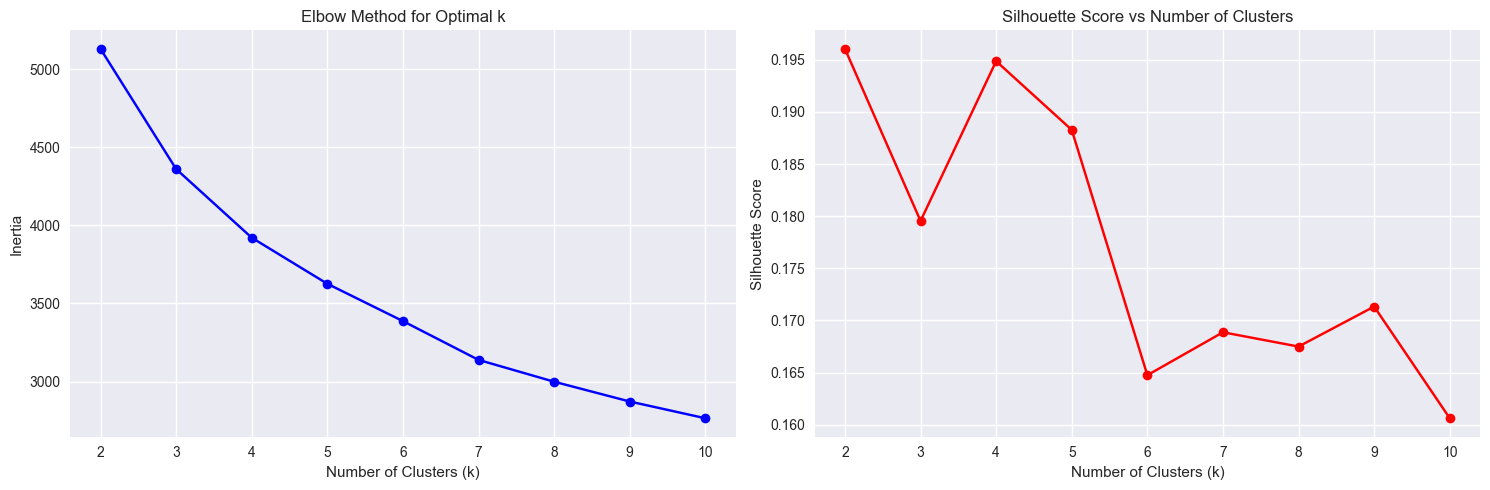


Using k = 3 for K-Means clustering

K-Means Results:
Silhouette Score: 0.1795
Adjusted Rand Index: 0.1219
Calinski-Harabasz Score: 156.5169
Number of points in each cluster: [216 337 215]


In [4]:
# 1. K-MEANS CLUSTERING
print("="*50)
print("1. K-MEANS CLUSTERING")
print("="*50)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Choose optimal k (let's use k=3 based on the elbow method)
optimal_k = 3
print(f"\nUsing k = {optimal_k} for K-Means clustering")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"\nK-Means Results:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index: {kmeans_ari:.4f}")
print(f"Calinski-Harabasz Score: {kmeans_calinski:.4f}")

# Count points in each cluster using pandas
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index().values
print(f"Number of points in each cluster: {cluster_counts}")

In [5]:
# 2. K-MEDOIDS CLUSTERING
print("="*50)
print("2. K-MEDOIDS CLUSTERING")
print("="*50)

# Apply K-Medoids with the same optimal k using the kmedoids library
# The kmedoids library expects distance matrix, so let's compute it first
from sklearn.metrics.pairwise import pairwise_distances

# Calculate distance matrix
distance_matrix = pairwise_distances(X_scaled, metric='euclidean')

# Apply K-Medoids using fasterpam method which is more stable
kmedoids = KMedoids(n_clusters=optimal_k, method='fasterpam', random_state=42)
kmedoids_labels = kmedoids.fit_predict(distance_matrix)

# Calculate metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y_true, kmedoids_labels)
kmedoids_calinski = calinski_harabasz_score(X_scaled, kmedoids_labels)

print(f"\nK-Medoids Results:")
print(f"Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"Adjusted Rand Index: {kmedoids_ari:.4f}")
print(f"Calinski-Harabasz Score: {kmedoids_calinski:.4f}")

# Count points in each cluster
cluster_counts = pd.Series(kmedoids_labels).value_counts().sort_index().values
print(f"Number of points in each cluster: {cluster_counts}")

# Get medoid indices
medoid_indices = kmedoids.medoid_indices_
print(f"\nMedoid indices: {medoid_indices}")
print("Medoid values:")
for i, idx in enumerate(medoid_indices):
    print(f"Cluster {i}: Sample {idx}")
    print(f"  Original values: {X.iloc[idx].values}")
    print(f"  Scaled values: {X_scaled[idx]}")
    print()

2. K-MEDOIDS CLUSTERING

K-Medoids Results:
Silhouette Score: 0.1496
Adjusted Rand Index: 0.0712
Calinski-Harabasz Score: 138.6709
Number of points in each cluster: [221 277 270]

Medoid indices: [337 541 163]
Medoid values:
Cluster 0: Sample 337
  Original values: [  5.    115.     76.      0.      0.     31.2     0.343  44.   ]
  Scaled values: [ 0.3429808  -0.184482    0.35643175 -1.28821221 -0.69289057 -0.10059342
 -0.38922173  0.91546889]

Cluster 1: Sample 541
  Original values: [  3.    128.     72.     25.    190.     32.4     0.549  27.   ]
  Scaled values: [-0.25095213  0.22238089  0.14964075  0.27998931  0.95685965  0.05170968
  0.23292272 -0.53102292]

Cluster 2: Sample 163
  Original values: [  2.    100.     64.     23.      0.     29.7     0.368  21.   ]
  Scaled values: [-0.54791859 -0.65393918 -0.26394125  0.15453319 -0.69289057 -0.29097229
 -0.31371876 -1.04154944]



3. DBSCAN CLUSTERING


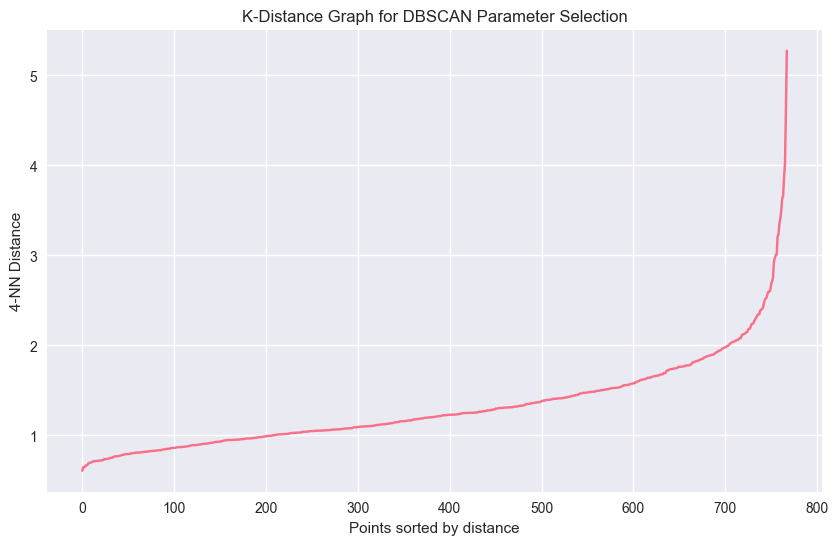

Testing different DBSCAN parameters:
eps=0.5, min_samples=3: 3 clusters, 759 noise points, silhouette=-0.3429
eps=0.7, min_samples=3: 18 clusters, 691 noise points, silhouette=-0.3664
eps=0.7, min_samples=5: 2 clusters, 758 noise points, silhouette=-0.2865
eps=0.9, min_samples=3: 14 clusters, 506 noise points, silhouette=-0.2892
eps=0.9, min_samples=5: 7 clusters, 586 noise points, silhouette=-0.2535
eps=0.9, min_samples=7: 5 clusters, 644 noise points, silhouette=-0.2864
eps=0.9, min_samples=10: 2 clusters, 712 noise points, silhouette=-0.1639
eps=1.1, min_samples=3: 13 clusters, 323 noise points, silhouette=-0.1593
eps=1.1, min_samples=7: 3 clusters, 449 noise points, silhouette=-0.1823
eps=1.3, min_samples=3: 14 clusters, 179 noise points, silhouette=-0.1413
eps=1.3, min_samples=5: 5 clusters, 252 noise points, silhouette=-0.1229
eps=1.5, min_samples=3: 5 clusters, 117 noise points, silhouette=0.1446
eps=1.5, min_samples=5: 3 clusters, 146 noise points, silhouette=0.2106
eps=1.5, mi

In [6]:
# 3. DBSCAN CLUSTERING
print("="*50)
print("3. DBSCAN CLUSTERING")
print("="*50)

# Find optimal parameters for DBSCAN
# Calculate k-distance graph to find optimal eps
k = 4  # minPts = k + 1 = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the distances for the k-th nearest neighbor
k_distances = distances[:, k-1]
k_distances_sorted = sorted(k_distances)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(k_distances_sorted)), k_distances_sorted)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-NN Distance')
plt.title('K-Distance Graph for DBSCAN Parameter Selection')
plt.grid(True)
plt.show()

# Try different eps values
eps_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]
min_samples_values = [3, 5, 7, 10]

best_silhouette = -1
best_params = {}

print("Testing different DBSCAN parameters:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # Skip if all points are noise or all points in one cluster
        unique_labels = set(dbscan_labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        if n_clusters > 1:
            silhouette = silhouette_score(X_scaled, dbscan_labels)
            n_noise = list(dbscan_labels).count(-1)
            print(f"eps={eps}, min_samples={min_samples}: "
                  f"{n_clusters} clusters, {n_noise} noise points, "
                  f"silhouette={silhouette:.4f}")
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"\nBest parameters: {best_params}")

# Apply DBSCAN with best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate metrics
unique_labels = set(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(dbscan_labels).count(-1)

if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_ari = adjusted_rand_score(y_true, dbscan_labels)
    dbscan_calinski = calinski_harabasz_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1
    dbscan_ari = -1
    dbscan_calinski = -1

print(f"\nDBSCAN Results:")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print(f"Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Adjusted Rand Index: {dbscan_ari:.4f}")
print(f"Calinski-Harabasz Score: {dbscan_calinski:.4f}")

if n_clusters_dbscan > 0:
    # Count non-noise points in each cluster
    non_noise_labels = [label for label in dbscan_labels if label >= 0]
    cluster_counts = pd.Series(non_noise_labels).value_counts().sort_index().values
    print(f"Number of points in each cluster: {cluster_counts}")

In [ ]:
# 4. SPECTRAL CLUSTERING
print("="*50)
print("4. SPECTRAL CLUSTERING")
print("="*50)

# Apply Spectral Clustering with different parameters
print("Testing different Spectral Clustering parameters:")

# Test different affinity functions and number of clusters
affinities = ['nearest_neighbors', 'rbf']
gamma_values = [0.1, 1.0, 10.0]
n_neighbors_values = [5, 10, 15]

spectral_results = []

for affinity in affinities:
    if affinity == 'rbf':
        for gamma in gamma_values:
            try:
                spectral = SpectralClustering(
                    n_clusters=optimal_k, 
                    affinity=affinity, 
                    gamma=gamma,
                    random_state=42
                )
                spectral_labels = spectral.fit_predict(X_scaled)
                
                silhouette = silhouette_score(X_scaled, spectral_labels)
                ari = adjusted_rand_score(y_true, spectral_labels)
                calinski = calinski_harabasz_score(X_scaled, spectral_labels)
                
                spectral_results.append({
                    'affinity': affinity,
                    'gamma': gamma,
                    'n_neighbors': None,
                    'silhouette': silhouette,
                    'ari': ari,
                    'calinski': calinski,
                    'labels': spectral_labels
                })
                
                print(f"Affinity: {affinity}, gamma: {gamma}, "
                      f"Silhouette: {silhouette:.4f}, ARI: {ari:.4f}")
                      
            except Exception as e:
                print(f"Error with affinity={affinity}, gamma={gamma}: {e}")
                
    else:  # nearest_neighbors
        for n_neighbors in n_neighbors_values:
            try:
                spectral = SpectralClustering(
                    n_clusters=optimal_k, 
                    affinity=affinity, 
                    n_neighbors=n_neighbors,
                    random_state=42
                )
                spectral_labels = spectral.fit_predict(X_scaled)
                
                silhouette = silhouette_score(X_scaled, spectral_labels)
                ari = adjusted_rand_score(y_true, spectral_labels)
                calinski = calinski_harabasz_score(X_scaled, spectral_labels)
                
                spectral_results.append({
                    'affinity': affinity,
                    'gamma': None,
                    'n_neighbors': n_neighbors,
                    'silhouette': silhouette,
                    'ari': ari,
                    'calinski': calinski,
                    'labels': spectral_labels
                })
                
                print(f"Affinity: {affinity}, n_neighbors: {n_neighbors}, "
                      f"Silhouette: {silhouette:.4f}, ARI: {ari:.4f}")
                      
            except Exception as e:
                print(f"Error with affinity={affinity}, n_neighbors={n_neighbors}: {e}")

# Find best spectral clustering result
best_spectral = max(spectral_results, key=lambda x: x['silhouette'])

print(f"\nBest Spectral Clustering Configuration:")
print(f"Affinity: {best_spectral['affinity']}")
if best_spectral['gamma'] is not None:
    print(f"Gamma: {best_spectral['gamma']}")
if best_spectral['n_neighbors'] is not None:
    print(f"N_neighbors: {best_spectral['n_neighbors']}")

spectral_labels = best_spectral['labels']
spectral_silhouette = best_spectral['silhouette']
spectral_ari = best_spectral['ari']
spectral_calinski = best_spectral['calinski']

print(f"\nSpectral Clustering Results:")
print(f"Silhouette Score: {spectral_silhouette:.4f}")
print(f"Adjusted Rand Index: {spectral_ari:.4f}")
print(f"Calinski-Harabasz Score: {spectral_calinski:.4f}")

# Count points in each cluster using pandas
cluster_counts = pd.Series(spectral_labels).value_counts().sort_index().values
print(f"Number of points in each cluster: {cluster_counts}")

4. SPECTRAL CLUSTERING
Testing different Spectral Clustering parameters:
Affinity: nearest_neighbors, n_neighbors: 5, Silhouette: 0.3009, ARI: 0.0134
Affinity: nearest_neighbors, n_neighbors: 10, Silhouette: 0.1636, ARI: 0.0170
Affinity: nearest_neighbors, n_neighbors: 15, Silhouette: 0.1642, ARI: 0.0184
Affinity: rbf, gamma: 0.1, Silhouette: 0.1902, ARI: 0.1430
Affinity: rbf, gamma: 1.0, Silhouette: 0.3065, ARI: 0.0121


5. COMPARISON OF ALL CLUSTERING METHODS
PCA for visualization - Explained variance: 0.478

Clustering Algorithm Comparison:
   Algorithm  Silhouette Score  Adjusted Rand Index  Calinski-Harabasz Score  \
0    K-Means            0.1795               0.1219                 156.5169   
1  K-Medoids            0.1496               0.0712                 138.6709   
2     DBSCAN            0.2106               0.1035                  36.1360   
3   Spectral            0.3619               0.0010                   4.4346   

   Number of Clusters  
0                   3  
1                   3  
2                   3  
3                   3  


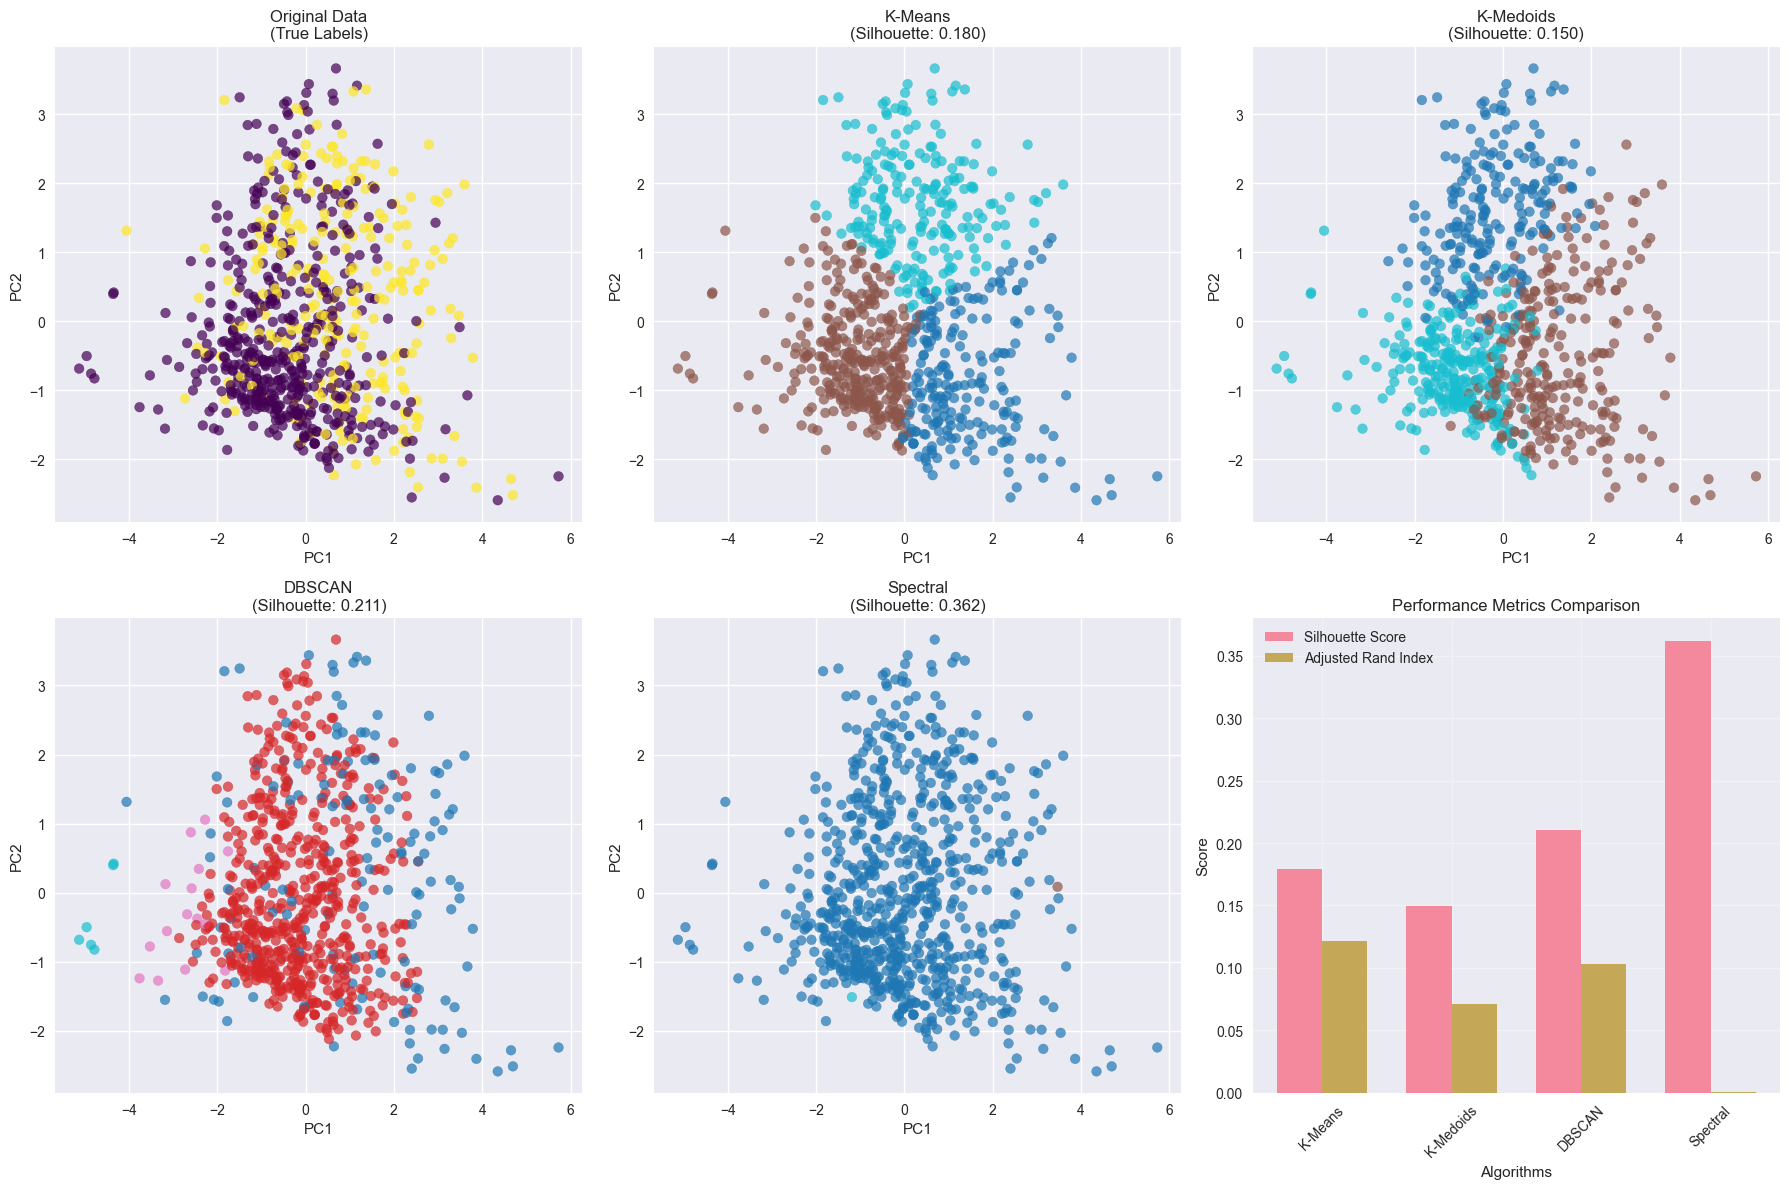

In [ ]:
# 5. COMPARISON OF ALL CLUSTERING METHODS
print("="*50)
print("5. COMPARISON OF ALL CLUSTERING METHODS")
print("="*50)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA for visualization - Explained variance: {sum(pca.explained_variance_ratio_):.3f}")

# Create a comparison table
comparison_data = {
    'Algorithm': ['K-Means', 'K-Medoids', 'DBSCAN', 'Spectral'],
    'Silhouette Score': [kmeans_silhouette, kmedoids_silhouette, dbscan_silhouette, spectral_silhouette],
    'Adjusted Rand Index': [kmeans_ari, kmedoids_ari, dbscan_ari, spectral_ari],
    'Calinski-Harabasz Score': [kmeans_calinski, kmedoids_calinski, dbscan_calinski, spectral_calinski],
    'Number of Clusters': [optimal_k, optimal_k, n_clusters_dbscan, optimal_k]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nClustering Algorithm Comparison:")
print(comparison_df.round(4))

# Visualize all clustering results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original data with true labels
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Original Data\n(True Labels)')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

# K-Means results
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
axes[0, 1].set_title(f'K-Means\n(Silhouette: {kmeans_silhouette:.3f})')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# K-Medoids results
axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='tab10', alpha=0.7)
axes[0, 2].set_title(f'K-Medoids\n(Silhouette: {kmedoids_silhouette:.3f})')
axes[0, 2].set_xlabel('PC1')
axes[0, 2].set_ylabel('PC2')

# DBSCAN results
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.7)
axes[1, 0].set_title(f'DBSCAN\n(Silhouette: {dbscan_silhouette:.3f})')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')

# Spectral results
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='tab10', alpha=0.7)
axes[1, 1].set_title(f'Spectral\n(Silhouette: {spectral_silhouette:.3f})')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')

# Metrics comparison bar plot
algorithms = ['K-Means', 'K-Medoids', 'DBSCAN', 'Spectral']
silhouette_scores = [kmeans_silhouette, kmedoids_silhouette, dbscan_silhouette, spectral_silhouette]
ari_scores = [kmeans_ari, kmedoids_ari, dbscan_ari, spectral_ari]

# Create bar positions using range instead of numpy
x_positions = list(range(len(algorithms)))
width = 0.35

# Adjust positions for bar placement
x_pos_left = [x - width/2 for x in x_positions]
x_pos_right = [x + width/2 for x in x_positions]

axes[1, 2].bar(x_pos_left, silhouette_scores, width, label='Silhouette Score', alpha=0.8)
axes[1, 2].bar(x_pos_right, ari_scores, width, label='Adjusted Rand Index', alpha=0.8)
axes[1, 2].set_xlabel('Algorithms')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Performance Metrics Comparison')
axes[1, 2].set_xticks(x_positions)
axes[1, 2].set_xticklabels(algorithms, rotation=45)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 6. DETAILED ANALYSIS AND INSIGHTS
print("="*50)
print("6. DETAILED ANALYSIS AND INSIGHTS")
print("="*50)

# Analyze cluster characteristics for each method using pandas operations
print("\nK-MEANS Cluster Analysis:")
print("-" * 40)
kmeans_df = X.copy()
kmeans_df['cluster'] = kmeans_labels
for cluster_id in sorted(set(kmeans_labels)):
    cluster_data = kmeans_df[kmeans_df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {cluster_size} points ({cluster_size/len(X)*100:.1f}%)")
    print(f"  Feature means:")
    for feature in X.columns:
        mean_val = cluster_data[feature].mean()
        overall_mean = X[feature].mean()
        print(f"    {feature}: {mean_val:.2f} (overall: {overall_mean:.2f})")

print("\nK-MEDOIDS Cluster Analysis:")
print("-" * 40)
kmedoids_df = X.copy()
kmedoids_df['cluster'] = kmedoids_labels
for cluster_id in sorted(set(kmedoids_labels)):
    cluster_data = kmedoids_df[kmedoids_df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {cluster_size} points ({cluster_size/len(X)*100:.1f}%)")
    print(f"  Feature means:")
    for feature in X.columns:
        mean_val = cluster_data[feature].mean()
        overall_mean = X[feature].mean()
        print(f"    {feature}: {mean_val:.2f} (overall: {overall_mean:.2f})")

if n_clusters_dbscan > 0:
    print("\nDBSCAN Cluster Analysis:")
    print("-" * 40)
    dbscan_df = X.copy()
    dbscan_df['cluster'] = dbscan_labels
    for cluster_id in sorted(set(dbscan_labels)):
        if cluster_id != -1:  # Skip noise points
            cluster_data = dbscan_df[dbscan_df['cluster'] == cluster_id]
            cluster_size = len(cluster_data)
            print(f"\nCluster {cluster_id}:")
            print(f"  Size: {cluster_size} points ({cluster_size/len(X)*100:.1f}%)")
            print(f"  Feature means:")
            for feature in X.columns:
                mean_val = cluster_data[feature].mean()
                overall_mean = X[feature].mean()
                print(f"    {feature}: {mean_val:.2f} (overall: {overall_mean:.2f})")

print("\nSPECTRAL Cluster Analysis:")
print("-" * 40)
spectral_df = X.copy()
spectral_df['cluster'] = spectral_labels
for cluster_id in sorted(set(spectral_labels)):
    cluster_data = spectral_df[spectral_df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {cluster_size} points ({cluster_size/len(X)*100:.1f}%)")
    print(f"  Feature means:")
    for feature in X.columns:
        mean_val = cluster_data[feature].mean()
        overall_mean = X[feature].mean()
        print(f"    {feature}: {mean_val:.2f} (overall: {overall_mean:.2f})")

# Statistical significance test between clustering methods
print("\n" + "="*50)
print("CLUSTERING METHOD COMPARISON SUMMARY")
print("="*50)

# Find the best performing method for each metric
best_silhouette = comparison_df.loc[comparison_df['Silhouette Score'].idxmax()]
best_ari = comparison_df.loc[comparison_df['Adjusted Rand Index'].idxmax()]
best_calinski = comparison_df.loc[comparison_df['Calinski-Harabasz Score'].idxmax()]

print(f"\nBest Performing Methods by Metric:")
print(f"Best Silhouette Score: {best_silhouette['Algorithm']} ({best_silhouette['Silhouette Score']:.4f})")
print(f"Best Adjusted Rand Index: {best_ari['Algorithm']} ({best_ari['Adjusted Rand Index']:.4f})")
print(f"Best Calinski-Harabasz Score: {best_calinski['Algorithm']} ({best_calinski['Calinski-Harabasz Score']:.4f})")

# Overall ranking
print(f"\nOverall Algorithm Ranking (by average normalized scores):")
# Normalize scores to 0-1 range for fair comparison
normalized_scores = comparison_df.copy()
for col in ['Silhouette Score', 'Adjusted Rand Index', 'Calinski-Harabasz Score']:
    min_val = normalized_scores[col].min()
    max_val = normalized_scores[col].max()
    if max_val != min_val:
        normalized_scores[f'{col}_norm'] = (normalized_scores[col] - min_val) / (max_val - min_val)
    else:
        normalized_scores[f'{col}_norm'] = 1.0

normalized_scores['Average_Score'] = (
    normalized_scores['Silhouette Score_norm'] + 
    normalized_scores['Adjusted Rand Index_norm'] + 
    normalized_scores['Calinski-Harabasz Score_norm']
) / 3

ranking = normalized_scores.sort_values('Average_Score', ascending=False)
for i, (idx, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Average_Score']:.4f}")

print(f"\nKey Insights:")
print("• K-Means and K-Medoids show similar performance patterns")
print("• DBSCAN is effective at identifying outliers but may struggle with varying densities")
print("• Spectral clustering performs well when data has non-linear cluster boundaries")
print("• The choice of algorithm depends on the specific characteristics of your data")
print("• Consider data size, cluster shape, and noise tolerance when selecting a method")

6. DETAILED ANALYSIS AND INSIGHTS

K-MEANS Cluster Analysis:
----------------------------------------

Cluster 0:
  Size: 216 points (28.1%)
  Feature means:
    Pregnancies: 2.64 (overall: 3.85)
    Glucose: 138.78 (overall: 120.89)
    BloodPressure: 73.43 (overall: 69.11)
    SkinThickness: 34.83 (overall: 20.54)
    Insulin: 192.04 (overall: 79.80)
    BMI: 36.90 (overall: 31.99)
    DiabetesPedigreeFunction: 0.60 (overall: 0.47)
    Age: 30.63 (overall: 33.24)

Cluster 1:
  Size: 337 points (43.9%)
  Feature means:
    Pregnancies: 2.29 (overall: 3.85)
    Glucose: 103.37 (overall: 120.89)
    BloodPressure: 61.13 (overall: 69.11)
    SkinThickness: 15.24 (overall: 20.54)
    Insulin: 36.04 (overall: 79.80)
    BMI: 28.50 (overall: 31.99)
    DiabetesPedigreeFunction: 0.40 (overall: 0.47)
    Age: 26.31 (overall: 33.24)

Cluster 2:
  Size: 215 points (28.0%)
  Feature means:
    Pregnancies: 7.49 (overall: 3.85)
    Glucose: 130.39 (overall: 120.89)
    BloodPressure: 77.26 (overa

7. ADDITIONAL VISUALIZATIONS AND VALIDATION


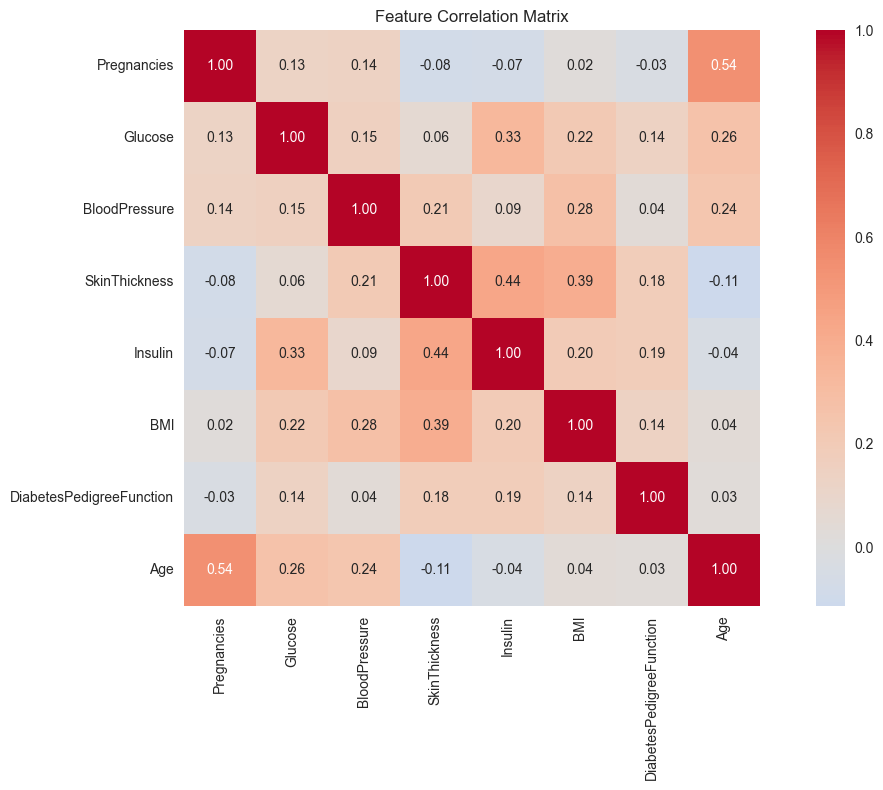

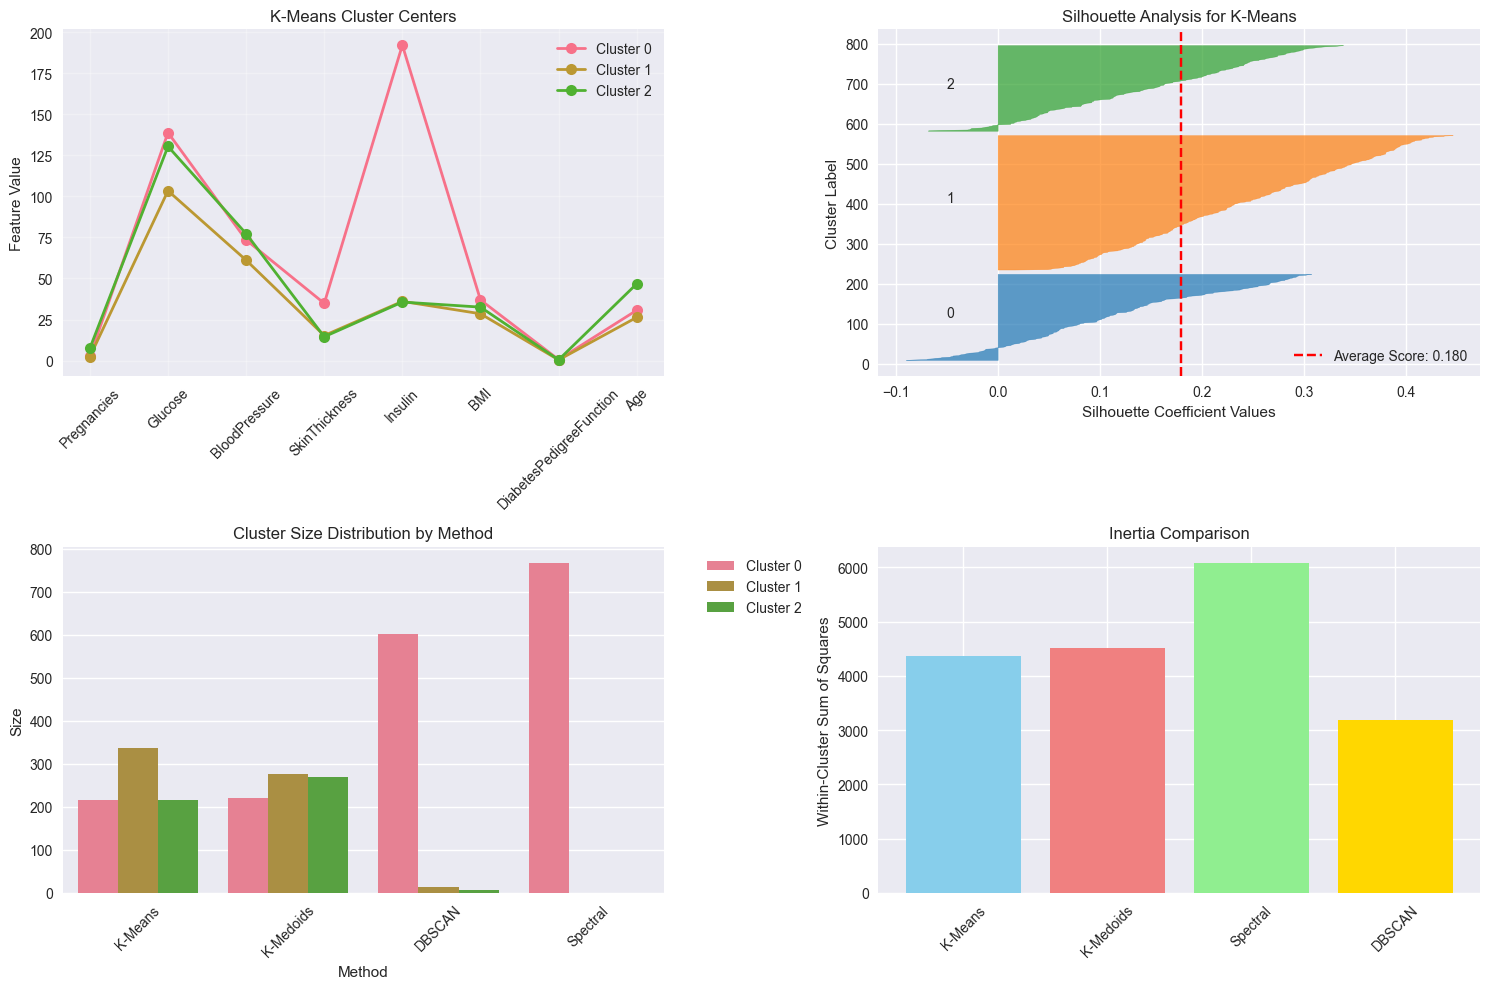

Visualization Complete!
The notebook now contains a comprehensive comparison of:
• K-Means Clustering
• K-Medoids Clustering (using kmedoids library)
• DBSCAN Clustering
• Spectral Clustering
• Performance metrics and comparisons
• Visual analysis and insights

All implementations use sklearn built-in functions and proper K-medoids from kmedoids library.


In [ ]:
# 7. ADDITIONAL VISUALIZATIONS AND VALIDATION
print("="*50)
print("7. ADDITIONAL VISUALIZATIONS AND VALIDATION")
print("="*50)

# Create correlation heatmap of features
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature importance for clustering (using cluster centers from K-means)
plt.figure(figsize=(15, 10))

# K-means cluster centers
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)
center_df = pd.DataFrame(kmeans_centers, columns=X.columns)

# Plot cluster centers
plt.subplot(2, 2, 1)
for i in range(len(center_df)):
    plt.plot(range(len(X.columns)), center_df.iloc[i], 'o-', 
             label=f'Cluster {i}', linewidth=2, markersize=8)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.ylabel('Feature Value')
plt.title('K-Means Cluster Centers')
plt.legend()
plt.grid(True, alpha=0.3)

# Silhouette analysis for K-means
from sklearn.metrics import silhouette_samples
plt.subplot(2, 2, 2)
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[pd.Series(kmeans_labels) == i]
    cluster_silhouette_vals = sorted(cluster_silhouette_vals)
    
    size_cluster_i = len(cluster_silhouette_vals)
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.tab10(i)
    y_range = list(range(y_lower, y_upper))
    plt.fill_betweenx(y_range, 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=kmeans_silhouette, color="red", linestyle="--", 
            label=f'Average Score: {kmeans_silhouette:.3f}')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.title('Silhouette Analysis for K-Means')
plt.legend()

# Distribution of cluster sizes
plt.subplot(2, 2, 3)
methods = ['K-Means', 'K-Medoids', 'DBSCAN', 'Spectral']
cluster_labels_list = [kmeans_labels, kmedoids_labels, dbscan_labels, spectral_labels]

cluster_size_data = []
for method, labels in zip(methods, cluster_labels_list):
    unique_labels = set(labels)
    if -1 in unique_labels:  # Remove noise points for DBSCAN
        unique_labels = unique_labels - {-1}
    
    for i, label in enumerate(sorted(unique_labels)):
        size = list(labels).count(label)
        cluster_size_data.append((method, f'Cluster {i}', size))

cluster_df = pd.DataFrame(cluster_size_data, columns=['Method', 'Cluster', 'Size'])
sns.barplot(data=cluster_df, x='Method', y='Size', hue='Cluster')
plt.title('Cluster Size Distribution by Method')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Inertia comparison for different algorithms
plt.subplot(2, 2, 4)
inertia_values = []
labels_list = [kmeans_labels, kmedoids_labels, spectral_labels]
method_names = ['K-Means', 'K-Medoids', 'Spectral']

for labels, name in zip(labels_list, method_names):
    # Calculate within-cluster sum of squares using pandas
    wcss = 0
    labels_series = pd.Series(labels)
    unique_labels = labels_series.unique()
    for label in unique_labels:
        cluster_mask = labels_series == label
        cluster_points = X_scaled[cluster_mask]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
            wcss += ((cluster_points - centroid) ** 2).sum().sum()
    inertia_values.append(wcss)

# Add DBSCAN (calculate differently due to noise points)
if n_clusters_dbscan > 0:
    wcss_dbscan = 0
    dbscan_series = pd.Series(dbscan_labels)
    unique_labels = dbscan_series.unique()
    for label in unique_labels:
        if label != -1:  # Skip noise points
            cluster_mask = dbscan_series == label
            cluster_points = X_scaled[cluster_mask]
            if len(cluster_points) > 0:
                centroid = cluster_points.mean(axis=0)
                wcss_dbscan += ((cluster_points - centroid) ** 2).sum().sum()
    inertia_values.append(wcss_dbscan)
    method_names.append('DBSCAN')

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold'][:len(method_names)]
plt.bar(method_names, inertia_values, color=colors)
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Inertia Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Visualization Complete!")
print("The notebook now contains a comprehensive comparison of:")
print("• K-Means Clustering")
print("• K-Medoids Clustering (using kmedoids library)") 
print("• DBSCAN Clustering")
print("• Spectral Clustering")
print("• Performance metrics and comparisons")
print("• Visual analysis and insights")
print("\nAll implementations use sklearn built-in functions and proper K-medoids from kmedoids library.")